In [2]:
!pip install pywavelets

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import pywt
import pandas as pd
import numpy as np
import math

import random
import matplotlib.pyplot as plt

In [0]:
def noisy_sin(steps_per_cycle = 50,
              number_of_cycles = 500,
              random_factor = 0.4):
  '''
  random_factor    : amont of noise in sign wave. 0 = no noise
  number_of_cycles : The number of steps required for one cycle

  Return : 
  pd.DataFrame() with column sin_t containing the generated sin wave 
  '''
  random.seed(0)
  df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
  df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
  df["sin_t_clean"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))
  print("create period-{} sin wave with {} cycles".format(steps_per_cycle,number_of_cycles))
  print("In total, the sin wave time series length is {}".format(steps_per_cycle*number_of_cycles+1))
  return(df)

create period-10 sin wave with 500 cycles
In total, the sin wave time series length is 5001


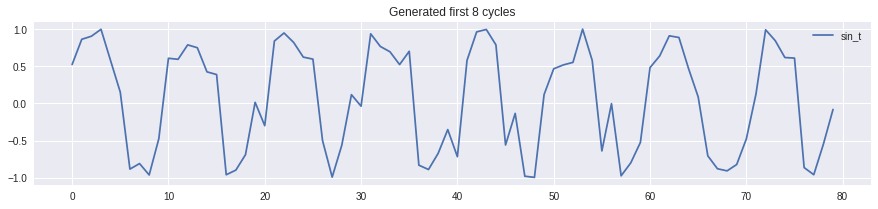

In [17]:
steps_per_cycle = 10

df = noisy_sin(steps_per_cycle=steps_per_cycle,
              random_factor = 0.8)

n_plot = 8
df[["sin_t"]].head(steps_per_cycle * n_plot).plot(
      title="Generated first {} cycles".format(n_plot),
      figsize=(15,3))

In [19]:
df.head()

,t,sin_t,sin_t_clean
0,0,0.523603,0.000000
1,1,0.862933,0.587785
2,2,0.904221,0.951057
3,3,0.997440,0.951057
4,4,0.573096,0.587785


In [0]:
import pywt
import numpy as np
from statsmodels.robust import mad
 
def waveletSmooth(x, wavelet="haar", level=1, title=None, sample=80):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec(x, wavelet, mode="per")
    
    # calculate a threshold
    sigma = mad(coeff[-level])
    
    # changing this threshold also changes the behavior,
    # but I have not played with this very much
    uthresh = sigma * np.sqrt( 2*np.log(len(x)))
    coeff[1:] = (pywt.threshold( i, value=uthresh, mode="soft") for i in coeff[1:])
    
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec(coeff, wavelet, mode="per" )
    f, ax = plt.subplots(figsize=(15,3))
    plt.plot(x[:sample], color="b", alpha=0.5)
    plt.plot(y[:sample], color="b")
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(y[:sample])))
    return y

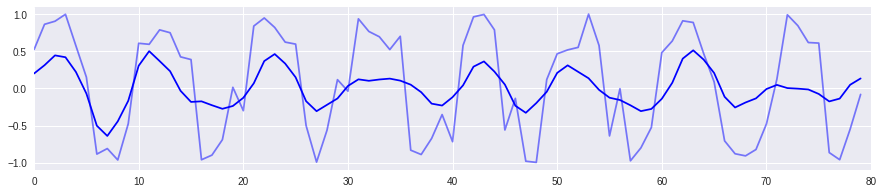

In [61]:
denoised_sin_t = waveletSmooth(df.sin_t, wavelet="db4", level=1)